In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
%matplotlib inline  


In [5]:
data = np.loadtxt('CasasMulti.txt')
X = np.c_[np.ones(data.shape[0]),data[:,0], data[:,1],data[:,2], data[:,3]]
y = np.c_[data[:,1]]
#------------------------------------
#Adicione su código
#Objetivo: - separar la data en X = Training Set y y = targets
#          - Insertar una columna de 1's en X

#-------------------------------------



In [13]:
#----------------------------------
#Adiciones su código
#Objetivo: Definir la función de normalización de características
def featureNormalize(X):
    mu = np.mean(X,axis=0)
    sigma = X.max(axis=0) - X.min(axis=0)
#     sigma = X.std(0)
    sigma[sigma == 0] = 1
    X_norm = X - mu;
    X_norm = np.divide(X_norm, sigma)
    X_norm[:, 0] =  1
    return (X_norm, mu, sigma)
#-----------------------------------

In [17]:
X, mu, sigma = featureNormalize(X)

In [41]:
#----------------------------------
#Adiciones su código
#Objetivo: Definir la función de Costo Multiples variables
def computeCostMulti(X, y, theta):
    m = y.size
    J = 0
    
    h = X.dot(theta)
    J = np.sum(np.square(h-y))/(2*m)
    return(J)
#--------------------------------------
computeCostMulti(X,y,)

TypeError: computeCostMulti() takes exactly 3 arguments (2 given)

In [32]:
#----------------------------------
#Adiciones su código
#Objetivo: Definir la función Gradiente descendente para múltiples variables
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)

    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - (alpha*(X.T.dot(h-y)))/m
        J_history[iter] = computeCostMulti(X, y, theta)
        
    return(theta, J_history)
#----------------------------------


In [35]:
#Elige los parámetros de alfa e iteraciones
alpha = 0.01
num_iters = 400
#Inicializa vector theta con ceros
nvars = 5
theta = np.zeros((nvars,1))
#Llamado a la función gradiente descendente para múltiples variables
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

('theta: ', array([ 3.21705853,  0.77432515,  0.65422209,  0.55865151,  0.09159055]))


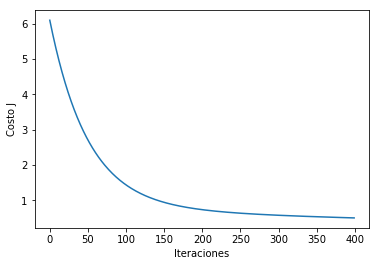

In [40]:
# vector theta para el mínimo costo J
print('theta: ',theta.ravel())

#Ploteo del historial de J
plt.plot(J_history)
plt.ylabel('Costo J')
plt.xlabel('Iteraciones');

In [38]:
#estimar el precio para una casa de: 200 m2, 4 baños, 5 dormitorios y $110xm2

sample=np.ones(5)
sample[1] = sample[1]*((200-mu[1])/sigma[1])
sample[2] = sample[2]*((4-mu[2])/sigma[2])
sample[3] = sample[3]*((5-mu[3])/sigma[3])
sample[4] = sample[4]*((110-mu[4])/sigma[4])
sample.dot(theta)

array([ 173.56719474])

In [39]:
# Registro de ejemplo normalizado
sample

array([   1.,  200.,    4.,    5.,  110.])

In [95]:
#----------------------------------
#Adiciones su código
#Objetivo: Definir la función de Ecuación Normal
def normalEqn(X,y):
    
    
    
    return theta
#-----------------------------------

In [96]:
# Resolviendo el problema con la Ecuación Normal
X = np.c_[np.ones(data.shape[0]),data[:,0:4]]
theta = normalEqn(X,y)


In [97]:
sample=np.ones(5)
sample[1] = sample[1]*200
sample[2] = sample[2]*4
sample[3] = sample[3]*5
sample[4] = sample[4]*110
sample.dot(theta)

array([ 400482.89092806])

In [94]:
theta

array([[ 85545.80823125],
       [  2449.26277778],
       [-66328.49083391],
       [  7336.76959031],
       [   488.31493204]])